Read files and save as **_obs_data and **_sim_data
** could be earth, sta and stb

In [250]:

import os
import numpy as np

# change the following line to the directory of results
os.chdir('/Users/yangchen/Downloads/Results')

# this function reads in the data
# the return (a dictionary) contains two arguments
# the first one is numpy array with numbers
# the second one is the (column) variable names

def read_data(filename_temp, row_skip_num = 4):
    temp = []
    with open(filename_temp, 'r') as f:
        for line in f.readlines()[row_skip_num:]:
            temp.append(line.split())
    temp = np.array([np.array(xi) for xi in temp])
    temp = temp.astype(np.float) 
    outputvar = dict()
    with open(filename_temp, 'r') as f:
        varnames = f.readlines()[row_skip_num-1].split()
    outputvar['colnames'] = varnames
    outputvar['values'] = temp
    return outputvar;


# three observational trajectories
earth_obs_data = read_data('obsdata/omni_2012_05_11T20_00_00.out', 4)
sta_obs_data = read_data('obsdata/sta_2012_05_11T20_00_00.out', 4)
stb_obs_data = read_data('obsdata/stb_2012_05_11T20_00_00.out', 4)

# three corresponding simulated trajectories
# need to change the run number and folder name to access different runs and different configurations/
filename_sim = 'run01_AWSoMR_HARMONICS_adapt_201205162000_MapTime_PoyntingFluxPerBSi_0.3e6/run01/IH/trj_earth_n00005000.sat'
earth_sim_data = read_data(filename_sim, 2)
filename_sim = 'run01_AWSoMR_HARMONICS_adapt_201205162000_MapTime_PoyntingFluxPerBSi_0.3e6/run01/IH/trj_sta_n00005000.sat'
sta_sim_data = read_data(filename_sim, 2)
filename_sim = 'run01_AWSoMR_HARMONICS_adapt_201205162000_MapTime_PoyntingFluxPerBSi_0.3e6/run01/IH/trj_stb_n00005000.sat'
stb_sim_data = read_data(filename_sim, 2)

# transform of variables in simulated data

# year, mo, dy, hr, mn and sc refer to year, month, day hour, minute, second

# The variables needed to be compared are Rho, B_tot=(Bx^2+By^2+Bz^2) and Temperate=P * 1.67e-24 / Rho / 1.3807e-23 * 1.e-7

# and V_tot = (Ux*X+Uy*Y+Uz*Z)/sqrt(X^2+Y^2+Z^2), which may also be sqrt(Ux^2+Uy^2+Uz^2)....

In [255]:
print(earth_obs_data['colnames'])
print(earth_obs_data['values'].shape)
print(earth_sim_data['colnames'])
print(earth_sim_data['values'].shape)


['count', 'year', 'mo', 'dy', 'hr', 'mn', 'sc', 'Rho', 'V_tot', 'Temperature', 'B_tot']
(721, 11)
['it', 'year', 'mo', 'dy', 'hr', 'mn', 'sc', 'msc', 'X', 'Y', 'Z', 'Rho', 'Ux', 'Uy', 'Uz', 'Bx', 'By', 'Bz', 'Ehot', 'I01', 'I02', 'Pe', 'P', 'jx', 'jy', 'jz']
(1441, 26)


Visualize the observations versus the simulations

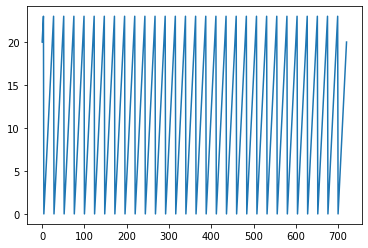

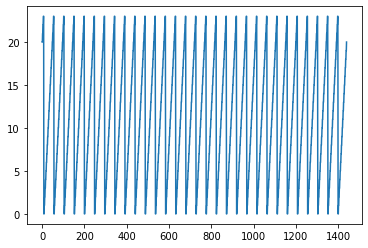

In [282]:
import matplotlib.pyplot as plt
plt.plot(earth_obs_data['values'][:,4])
plt.show()


plt.plot(earth_sim_data['values'][:,4])
plt.show()

# Task 1: Compare observed trajectory with simulated trajectory


 AWSoM metric paper -- a few criteria 
 
 Pay attention to the weights of different parts of the trajectory 
 
 Observational noise (To be understood)